In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import quandl
import statsmodels.formula.api as sm
quandl.ApiConfig.api_key = 'nsqaaHBqkWMWVvYEH9-9'

In [4]:
googl_table  = quandl.get('WIKI/GOOGL')
amzn_table = quandl.get('WIKI/AMZN')
ebay_table = quandl.get('WIKI/EBAY')
wal_table  = quandl.get('WIKI/WMT')
aapl_table = quandl.get('WIKI/AAPL')

In [6]:
googl  = googl_table .loc['2016',['Close']]
amzn = amzn_table.loc['2016',['Close']]
ebay = ebay_table.loc['2016',['Close']]
wal  = wal_table .loc['2016',['Close']]
aapl = aapl_table.loc['2016',['Close']]

In [8]:
googl_log  = np.log(googl.Close) .diff().dropna()
amzn_log = np.log(amzn.Close).diff().dropna()
ebay_log = np.log(ebay.Close).diff().dropna()
wal_log  = np.log(wal.Close) .diff().dropna()
aapl_log = np.log(aapl.Close).diff().dropna()
df = pd.concat([googl_log,amzn_log,ebay_log,wal_log,aapl_log],axis = 1).dropna()
df.columns = ['GOOGL', 'AMZN', 'EBAY', 'WAL', 'AAPL']

In [13]:
simple = sm.ols(formula = 'AMZN ~ GOOGL', data = df).fit()
simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AMZN   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     139.7
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           6.97e-26
Time:                        08:22:39   Log-Likelihood:                 704.00
No. Observations:                 251   AIC:                            -1404.
Df Residuals:                     249   BIC:                            -1397.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.001      0.542      0.589      -0.001       0.002
GOOGL          0.8685      0.073     11.819      0.000       0.724       1.013
==============================================================================
Omnibus:                       70.625   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1562.144
Skew:                          -0.440   Prob(JB):                         0.00
Kurtosis:                      15.190   Cond. No.                         79.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model = sm.ols(formula = 'AMZN ~ GOOGL+EBAY+WAL', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AMZN   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     46.34
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           8.59e-24
Time:                        08:23:07   Log-Likelihood:                 704.14
No. Observations:                 251   AIC:                            -1400.
Df Residuals:                     247   BIC:                            -1386.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.001      0.560      0.576      -0.001       0.002
GOOGL          0.8816      0.078     11.319      0.000       0.728       1.035
EBAY          -0.0189      0.050     -0.375      0.708      -0.118       0.080
WAL           -0.0273      0.079     -0.346      0.730      -0.183       0.128
==============================================================================
Omnibus:                       70.481   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1441.386
Skew:                          -0.475   Prob(JB):                         0.00
Kurtosis:                      14.701   Cond. No.                         91.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# TO DO: apply fama - french with new libraries

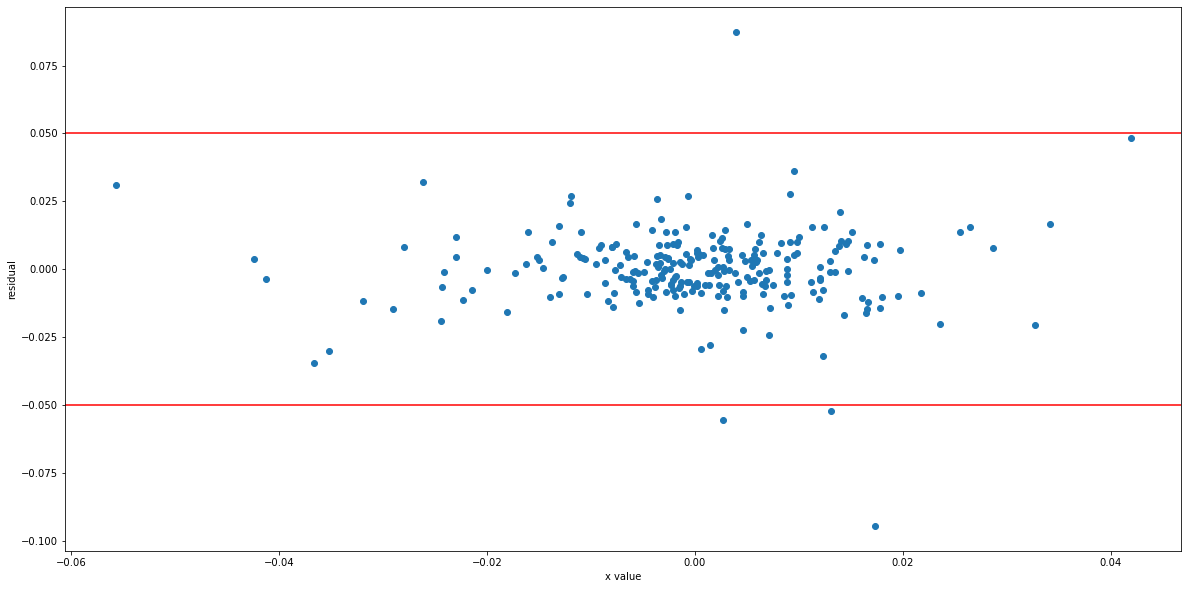

In [19]:
plt.figure(figsize = (20,10))
plt.scatter(df.GOOGL,simple.resid)
plt.axhline(0.05,color='red')
plt.axhline(-0.05, color='red')
plt.xlabel('x value')
plt.ylabel('residual')
plt.show()